# BFS

In [36]:
def bfs(start,goal):
    stack=[(start,[start])]
    visited=set([start])
    while stack:
        current,path=stack.pop()
        if current==goal:
            return path
        for neighbor in reversed(graph[current]):
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append((neighbor,path+[neighbor]))
    return "Path not found"
    
graph={
    '5':['3','7'],
    '3':['2','4'],
    '4':['3','8'],
    '7':['5','8'],
    '8':['7','4'],
    '2':[]
}
start='5'
goal='8'
solution=bfs(start,goal)
if solution!="Path not found":
    print(f'Path found from {start} to {goal} is : {solution}')
else:
    print("Path not found")

Path found from 5 to 8 is : ['5', '3', '4', '8']


In [37]:
from collections import deque

def bfs(graph, start, goal):
    queue = deque([start])
    explored = {start: None}
    processed_nodes = [] 
    while queue:
        node = queue.popleft()
        processed_nodes.append(node) 
        print(f"Processing node: {node}") 
        if node == goal:
            path = []
            while node is not None:
                path.append(node)
                node = explored[node]
            return " -> ".join(reversed(path)), processed_nodes
        for neighbor in graph.get(node, []):
            if neighbor not in explored:
                explored[neighbor] = node
                queue.append(neighbor)

    return "No path found", processed_nodes
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'G'],
    'E': ['B', 'H'],
    'F': ['C', 'I'],
    'G': ['D', 'J'],
    'H': ['E', 'K'],
    'I': ['F', 'K'],
    'J': ['G', 'K'],
    'K': ['H', 'I', 'J']
}
path, processed_nodes = bfs(graph, 'A', 'K')
print(f"Shortest path from A to K: {path}")
print(f"Processed nodes: {processed_nodes}")

Processing node: A
Processing node: B
Processing node: C
Processing node: D
Processing node: E
Processing node: F
Processing node: G
Processing node: H
Processing node: I
Processing node: J
Processing node: K
Shortest path from A to K: A -> B -> E -> H -> K
Processed nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']


# DFS

In [ ]:
def dfs(start, goal):
    stack = [(start, [start])]
    visited = set([start])
    
    while stack:
        current, path = stack.pop()
        if current == goal:
            return path
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append((neighbor, path + [neighbor]))
    
    return "Path not found"

graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '4': ['3', '8'],
    '7': ['5', '8'],
    '8': ['7', '4'],
    '2': []
}

start = '5'
goal = '8'
solution = dfs(start, goal)

if solution != "Path not found":
    print(f'Path found from {start} to {goal} is: {solution}')
else:
    print("Path not found")

Path found from 5 to 8 is: ['5', '7', '8']


In [ ]:
def dfs(graph, start, goal):
    stack = [start]
    explored = {start: None}
    processed_nodes = [] 

    while stack:
        node = stack.pop()
        processed_nodes.append(node) 
        print(f"Processing node: {node}") 

        if node == goal:
            path = []
            while node is not None:
                path.append(node)
                node = explored[node]
            return " -> ".join(reversed(path)), processed_nodes

        for neighbor in graph.get(node, []):
            if neighbor not in explored:
                explored[neighbor] = node
                stack.append(neighbor)

    return "No path found", processed_nodes

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'G'],
    'E': ['B', 'H'],
    'F': ['C', 'I'],
    'G': ['D', 'J'],
    'H': ['E', 'K'],
    'I': ['F', 'K'],
    'J': ['G', 'K'],
    'K': ['H', 'I', 'J']
}
path, processed_nodes = dfs(graph, 'A', 'K')
print(f"Path from A to K: {path}")
print(f"Processed nodes: {processed_nodes}")

Processing node: A
Processing node: C
Processing node: F
Processing node: I
Processing node: K
Path from A to K: A -> C -> F -> I -> K
Processed nodes: ['A', 'C', 'F', 'I', 'K']


# IDDLS

In [46]:
class PuzzleState:
    def __init__(self, board, empty_tile_pos, moves=0):
        self.board = board
        self.empty_tile_pos = empty_tile_pos
        self.moves = moves

    def is_goal(self, goal_state):
        return self.board == goal_state

    def get_possible_moves(self):
        row, col = self.empty_tile_pos
        directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        return [(row + dr, col + dc) for dr, dc in directions if 0 <= row + dr < 3 and 0 <= col + dc < 3]

    def move_tile(self, new_empty_tile_pos):
        new_row, new_col = new_empty_tile_pos
        new_board = [list(row) for row in self.board]
        new_board[self.empty_tile_pos[0]][self.empty_tile_pos[1]], new_board[new_row][new_col] = \
            new_board[new_row][new_col], new_board[self.empty_tile_pos[0]][self.empty_tile_pos[1]]
        return PuzzleState(new_board, new_empty_tile_pos)

def DLS(state, goal_state, depth):
    if state.is_goal(goal_state):
        return state
    if depth == 0:
        return None
    for new_empty_pos in state.get_possible_moves():
        new_state = state.move_tile(new_empty_pos)
        result = DLS(new_state, goal_state, depth - 1)
        if result:
            return result
    return None

def IDDLS(initial_board, goal_board):
    empty_tile_pos = next((i, row.index(0)) for i, row in enumerate(initial_board) if 0 in row)
    initial_state = PuzzleState(initial_board, empty_tile_pos)
    depth = 0
    while True:
        result = DLS(initial_state, goal_board, depth)
        if result:
            return result, depth
        depth += 1

def print_board(board):
    for row in board:
        print(" ".join(map(str, row)))

initial_state = [
    [1, 2, 3],
    [0, 4, 6],
    [7, 5, 8]
]

goal_state = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
]

solution, depth = IDDLS(initial_state, goal_state)
if solution:
    print(f"Solution found at depth: {depth}")
    print_board(solution.board)
else:
    print("No path found")

Solution found at depth: 3
1 2 3
4 5 6
7 8 0


# GBFS

In [51]:
graph = {
    'a': [("c", 4), ("d", 1)],
    'b': [("e", 3), ("f", 1)],
    'c': [],
    'd': [],
    'e': [("h", 5)],
    'f': [("i", 2), ("g", 3)],
    'g': [],
    'h': [],
    'i': [],
    "s": [("a", 3), ("b", 2)]
}

heuristic = {
    "a": 12,
    "b": 4,
    "c": 7,
    "d": 3,
    "e": 8,
    "f": 2,
    "h": 4,
    "i": 9,
    "s": 13,
    "g": 0
}

In [52]:
start_node = "s"
goal_node = "g"
path = [start_node]

def search_goal(curr_node):
    if curr_node == goal_node:
        return True
    max_heuristic = float('inf')
    next_node = None
    for neighbor, _ in graph[curr_node]:
        if heuristic[neighbor] <= max_heuristic:
            next_node = neighbor
            max_heuristic = heuristic[neighbor]
    if next_node:
        path.append(next_node)
        return search_goal(next_node)
    return False

def calculate_cost(path):
    total_cost = 0
    for i in range(len(path) - 1):
        for neighbor, cost in graph[path[i]]:
            if neighbor == path[i+1]:
                total_cost += cost
                break
    return total_cost
if search_goal(start_node):
    print(f"Path: {' -> '.join(path)}")
    cost = calculate_cost(path)
    print(f"Cost: {cost}")
else:
    print("Goal node not reachable")


Path: s -> b -> f -> g
Cost: 6


# A*

In [ ]:
from heapq import heappop, heappush
def a_star_search(graph: dict, start: str, goal: str, heuristic_values: dict):
    open_list, closed_list = [(heuristic_values[start], start)], set()
    parent_map = {start: None}
    g_cost = {start: 0}

    while open_list:
        cost, node = heappop(open_list)

        if node == goal:
            path = []
            while node is not None:
                path.append(node)
                node = parent_map[node]
            path.reverse()
            return path, g_cost[goal]

        if node in closed_list:
            continue

        closed_list.add(node)
        cost -= heuristic_values[node]

        for neighbor, edge_cost in graph[node]:
            if neighbor in closed_list:
                continue

            new_g_cost = g_cost[node] + edge_cost
            if neighbor not in g_cost or new_g_cost < g_cost[neighbor]:
                g_cost[neighbor] = new_g_cost
                f_score = new_g_cost + heuristic_values[neighbor]
                heappush(open_list, (f_score, neighbor))
                parent_map[neighbor] = node

    return None, -1

EXAMPLE_GRAPH = {
    'S': [('A', 4), ('B', 10), ('C', 11)],
    'A': [('B', 8), ('D', 5)],
    'B': [('D', 15)],
    'C': [('D', 8), ('E', 20), ('F', 2)],
    'D': [('F', 1), ('I', 20), ('H', 16)],
    'E': [('G', 19)],
    'F': [('G', 13)],
    'H': [('J', 2), ('I', 1)],
    'I': [('K', 13), ('G', 5), ('J', 5)],
    'J': [('K', 7)],
    'K': [('G', 16)]
}

EXAMPLE_HEURISTIC_VALUES = {
    'S': 7,
    'A': 8,
    'B': 6,
    'C': 5,
    'D': 5,
    'E': 3,
    'F': 3,
    'G': 0,
    'H': 7,
    'I': 4,
    'J': 5,
    'K': 3
}

path, cost = a_star_search(EXAMPLE_GRAPH, 'S', 'G', EXAMPLE_HEURISTIC_VALUES)
if path:
    print(f"Path: {' -> '.join(path)}")
    print(f"Cost: {cost}")
else:
    print("No path found")


Path: S -> A -> D -> F -> G
Cost: 23


# Genetic Algorithm

In [34]:
import random
import numpy as np

N_QUEENS = 8
POPULATION_SIZE = 100
MAX_GENERATIONS = 1000
MUTATION_RATE = 0.1

def fitness(chromosome):
    non_conflict_pairs = 0
    for i in range(len(chromosome)):
        for j in range(i + 1, len(chromosome)):
            if chromosome[i] != chromosome[j] and abs(chromosome[i] - chromosome[j]) != j - i:
                non_conflict_pairs += 1
    return non_conflict_pairs

def generate_population(size, initial_chromosome):
    population = [initial_chromosome]
    while len(population) < size:
        population.append(random.sample(range(N_QUEENS), N_QUEENS))
    return population

def select(population):
    tournament = random.sample(population, k=5)
    return max(tournament, key=fitness)

def crossover(parent1, parent2):
    point = random.randint(1, N_QUEENS - 1)
    child = parent1[:point] + parent2[point:]
    return child

def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        i = random.randint(0, N_QUEENS - 1)
        j = random.randint(0, N_QUEENS - 1)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

def chromosome_to_matrix(chromosome):
    matrix = np.zeros((N_QUEENS, N_QUEENS), dtype=int)
    for col, row in enumerate(chromosome):
        matrix[row][col] = 1
    return matrix

def genetic_algorithm(initial_chromosome):
    
    population = generate_population(POPULATION_SIZE, initial_chromosome)
    
    for generation in range(MAX_GENERATIONS):
        population = sorted(population, key=fitness, reverse=True)
        
        best_individual = population[0]
        best_fitness = fitness(best_individual)
        
        print(f"Generation {generation}: Best fitness = {best_fitness}, Best individual = {best_individual}")
        
        if best_fitness == (N_QUEENS * (N_QUEENS - 1)) // 2:
            print(f"Solution found in generation {generation}")
            solution_matrix = chromosome_to_matrix(best_individual)
            print("Solution list:", best_individual)
            print("Solution matrix:")
            print(solution_matrix)
            return best_individual, solution_matrix
        
        new_population = []
        while len(new_population) < POPULATION_SIZE:
            parent1 = select(population)
            parent2 = select(population)
            child = crossover(parent1, parent2)
            mutate(child)
            new_population.append(child)
        
        population = new_population
    
    print("No solution found")
    return None, None

initial_chromosome = [0,1,2,3,4,5,6,7]
solution_list, solution_matrix = genetic_algorithm(initial_chromosome)
if solution_list is not None:
    print("Final solution list:", solution_list)
    print("Final solution matrix:")
    for i in solution_matrix:
        for j in i:
            if j == 1:
                print("Q", end=" ")
            else:
                print(".", end=" ")
        print()
else:
    print("No valid solution found.")


Generation 0: Best fitness = 27, Best individual = [4, 2, 7, 5, 1, 0, 6, 3]
Generation 1: Best fitness = 27, Best individual = [3, 6, 2, 5, 1, 4, 0, 3]
Generation 2: Best fitness = 27, Best individual = [7, 6, 2, 5, 1, 4, 0, 3]
Generation 3: Best fitness = 27, Best individual = [4, 2, 7, 5, 1, 6, 0, 3]
Generation 4: Best fitness = 27, Best individual = [7, 6, 2, 5, 1, 4, 0, 3]
Generation 5: Best fitness = 27, Best individual = [3, 6, 2, 5, 1, 4, 0, 3]
Generation 6: Best fitness = 27, Best individual = [7, 6, 2, 5, 1, 4, 0, 3]
Generation 7: Best fitness = 27, Best individual = [3, 6, 2, 5, 1, 4, 0, 3]
Generation 8: Best fitness = 27, Best individual = [7, 6, 2, 5, 1, 4, 0, 3]
Generation 9: Best fitness = 27, Best individual = [7, 6, 2, 5, 1, 4, 0, 3]
Generation 10: Best fitness = 27, Best individual = [7, 6, 2, 5, 1, 4, 0, 3]
Generation 11: Best fitness = 27, Best individual = [7, 6, 2, 5, 1, 4, 0, 3]
Generation 12: Best fitness = 28, Best individual = [1, 6, 2, 5, 7, 4, 0, 3]
Solution 

# Gentic ALGORITHM

In [ ]:
import random
def generate_board_state():
    return [random.randint(0, 7) for _ in range(8)]
def calculate_fitness(board):
    conflicts = 0
    for i in range(8):
        for j in range(i + 1, 8):
            if board[i] == board[j] or abs(board[i] - board[j]) == j - i:
                conflicts += 1
    return 28 - conflicts
def crossover(parent1, parent2):
    crossover_point = random.randint(1, 7)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child
def mutate(board_state):
    pos1, pos2 = random.sample(range(8), 2)
    board_state[pos1], board_state[pos2] = board_state[pos2], board_state[pos1]
    return board_state

def tournament_selection(population):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda x: x[1])

population = [(generate_board_state(), 0) for _ in range(50)]

for generation in range(1000):
    print("Iteration :- ", generation + 1)
    population = [(board_state, calculate_fitness(board_state)) for board_state, _ in population]
    print("Initial Population :- ")
    for i in population:
        print(i)
    best_board_state = max(population, key=lambda x: x[1])[0]
    if calculate_fitness(best_board_state) == 28:
        print("Goal reached at generation:", generation)
        break
    new_population = []
    new_population.append(max(population, key=lambda x: x[1]))
    print("Mutated Children :- ")
    while len(new_population) < 50:
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child = crossover(parent1[0], parent2[0])
        child = mutate(child)
        print(child)
        new_population.append((child, 0))
    population = new_population


Iteration :-  1
Initial Population :- 
([2, 1, 5, 7, 6, 5, 5, 0], 18)
([7, 1, 6, 3, 1, 1, 2, 2], 20)
([0, 7, 0, 1, 7, 4, 1, 0], 21)
([0, 4, 2, 3, 4, 1, 7, 5], 20)
([7, 3, 6, 2, 6, 3, 3, 4], 21)
([2, 0, 7, 7, 7, 6, 2, 3], 21)
([6, 2, 6, 2, 7, 6, 0, 1], 19)
([6, 6, 7, 5, 4, 3, 3, 4], 19)
([6, 3, 0, 1, 0, 7, 1, 2], 20)
([3, 2, 4, 1, 4, 7, 2, 5], 21)
([5, 4, 2, 1, 1, 6, 6, 3], 21)
([5, 4, 7, 6, 6, 1, 0, 5], 21)
([5, 1, 7, 0, 6, 0, 5, 2], 22)
([1, 0, 0, 1, 3, 3, 6, 5], 16)
([5, 4, 3, 3, 6, 2, 7, 2], 22)
([0, 5, 4, 6, 2, 0, 7, 2], 21)
([6, 6, 5, 0, 7, 0, 2, 3], 23)
([2, 2, 1, 6, 5, 1, 1, 6], 19)
([1, 5, 2, 2, 5, 7, 6, 3], 23)
([3, 1, 1, 4, 4, 3, 4, 7], 17)
([5, 1, 0, 0, 2, 3, 5, 5], 17)
([7, 1, 1, 1, 3, 1, 6, 2], 19)
([7, 2, 6, 2, 4, 2, 5, 2], 19)
([0, 1, 7, 6, 0, 3, 1, 5], 23)
([4, 6, 4, 3, 7, 5, 6, 4], 19)
([3, 5, 3, 6, 2, 5, 3, 4], 20)
([2, 0, 0, 4, 5, 1, 5, 0], 20)
([4, 2, 5, 0, 7, 2, 5, 2], 19)
([5, 2, 5, 5, 4, 7, 6, 5], 16)
([4, 0, 5, 5, 1, 7, 1, 0], 21)
([1, 4, 1, 6, 6, 4, 6, 6], 15)


In [28]:
ini


[7, 0, 0, 0, 3, 7, 0, 7]

In [29]:
calculate_fitness(ini)

17

In [30]:
crossover(ini, ini)

[7, 0, 0, 0, 3, 7, 0, 7]

In [31]:
mutate(ini)

[0, 0, 0, 0, 3, 7, 7, 7]

In [25]:
best_board_state


[4, 7, 3, 0, 6, 1, 5, 2]

# Alpha Beta Pruning

In [59]:
import math

PLAYER_X, PLAYER_O, EMPTY = 'X', 'O', '-'
pruned_nodes = {}

def print_board(board):
    for row in board:
        print(' '.join(row))
    print()

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != EMPTY:
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != EMPTY:
            return board[0][i]
    if board[0][0] == board[1][1] == board[2][2] != EMPTY:
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != EMPTY:
        return board[0][2]
    return None

def is_draw(board):
    return all(cell != EMPTY for row in board for cell in row) and check_winner(board) is None

def utility(board):
    winner = check_winner(board)
    return (1 if winner == PLAYER_X else -1 if winner == PLAYER_O else 0)

def terminal_test(board):
    return check_winner(board) is not None or is_draw(board)

def get_possible_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == EMPTY]

def alpha_beta_search(board, depth, alpha, beta, maximizing_player):
    if terminal_test(board) or depth == 0:
        return utility(board), None
    
    best_move = None
    for i, j in get_possible_moves(board):
        board[i][j] = PLAYER_X if maximizing_player else PLAYER_O
        eval, _ = alpha_beta_search(board, depth - 1, alpha, beta, not maximizing_player)
        board[i][j] = EMPTY
        
        if maximizing_player:
            if eval > alpha: alpha, best_move = eval, (i, j)
            if beta <= alpha: 
                pruned_nodes[(i, j)] = (alpha, beta)
                break
        else:
            if eval < beta: beta, best_move = eval, (i, j)
            if beta <= alpha: 
                pruned_nodes[(i, j)] = (alpha, beta)
                break
            
    return (alpha if maximizing_player else beta), best_move

def play_game(initial_board):
    board = [row[:] for row in initial_board]
    print("Initial board:")
    print_board(board)
    
    alpha, move = alpha_beta_search(board, depth=9, alpha=-math.inf, beta=math.inf, maximizing_player=True)
    if move:
        board[move[0]][move[1]] = PLAYER_X
        print(f"Best move for X: {move}")
    else:
        print("No valid moves available.")
    
    print("Final board:")
    print_board(board)
    print(f"Alpha value at root node: {alpha if move else 'N/A'}")
    print(f"Beta value at root node: {0 if move else 'N/A'}")

    if pruned_nodes:
        print("Pruned nodes and their alpha-beta values:")
        for node, values in pruned_nodes.items():
            print(f"Node: {node}, Alpha: {values[0]}, Beta: {values[1]}")

# Initial board setup
initial_board = [
    [PLAYER_X, PLAYER_O, EMPTY],
    [EMPTY, PLAYER_X, EMPTY],
    [EMPTY, EMPTY, PLAYER_O]
]

play_game(initial_board)

Initial board:
X O -
- X -
- - O

Best move for X: (1, 0)
Final board:
X O -
X X -
- - O

Alpha value at root node: 1
Beta value at root node: 0
Pruned nodes and their alpha-beta values:
Node: (2, 0), Alpha: 0, Beta: -1
Node: (1, 2), Alpha: 1, Beta: -1
Node: (2, 1), Alpha: -1, Beta: -1
Node: (1, 0), Alpha: 1, Beta: 1
Node: (0, 2), Alpha: 1, Beta: 1


In [29]:
import math

PLAYER_X = 'X'
PLAYER_O = 'O'
EMPTY = '-'

pruned_nodes = {}

def print_board(board):
    for row in board:
        print(' '.join(row))
    print()

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != EMPTY:
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != EMPTY:
            return board[0][i]
    
    if board[0][0] == board[1][1] == board[2][2] != EMPTY:
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != EMPTY:
        return board[0][2]
    
    return None

def is_draw(board):
    return all(cell != EMPTY for row in board for cell in row) and check_winner(board) is None

def utility(board, player):
    winner = check_winner(board)
    if winner == PLAYER_X:
        return 1  
    elif winner == PLAYER_O:
        return -1  
    return 0

def terminal_test(board):
    return check_winner(board) is not None or is_draw(board)

def get_possible_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == EMPTY]

def alpha_beta_search(board, depth, alpha, beta, maximizing_player):
    if terminal_test(board) or depth == 0:
        return utility(board, PLAYER_X if maximizing_player else PLAYER_O), None, alpha, beta

    if maximizing_player:
        max_eval = -math.inf
        best_move = None
        for i, j in get_possible_moves(board):
            board[i][j] = PLAYER_X
            eval, _, _, _ = alpha_beta_search(board, depth - 1, alpha, beta, False)
            board[i][j] = EMPTY
            if eval == 1: 
                return eval, (i, j), alpha, beta
            if eval > max_eval:
                max_eval = eval
                best_move = (i, j)
            alpha = max(alpha, eval)
            if beta <= alpha:
                pruned_nodes[(i, j)] = (alpha, beta)
                break
        return max_eval, best_move, alpha, beta
    else:
        min_eval = math.inf
        best_move = None
        for i, j in get_possible_moves(board):
            board[i][j] = PLAYER_O
            eval, _, _, _ = alpha_beta_search(board, depth - 1, alpha, beta, True)
            board[i][j] = EMPTY
            if eval == -1:  
                return eval, (i, j), alpha, beta
            if eval < min_eval:
                min_eval = eval
                best_move = (i, j)
            beta = min(beta, eval)
            if beta <= alpha:
                pruned_nodes[(i, j)] = (alpha, beta)
                break
        return min_eval, best_move, alpha, beta

def find_best_move(board, maximizing_player):
    
    alpha = -math.inf if maximizing_player else 0
    beta = 0 if maximizing_player else math.inf
    _, move, final_alpha, final_beta = alpha_beta_search(board, depth=9, alpha=alpha, beta=beta, maximizing_player=maximizing_player)
    return move, final_alpha, final_beta

def apply_move(board, move, player):
    if move:
        board[move[0]][move[1]] = player

def play_game(initial_board, maximizing_player):
    board = [row[:] for row in initial_board]  
    print("Initial board:")
    print_board(board)
    
    move, final_alpha, final_beta = find_best_move(board, maximizing_player)
    if move:
        apply_move(board, move, PLAYER_X if maximizing_player else PLAYER_O)
        print(f"Best move for {'X' if maximizing_player else 'O'}: {move}")
    else:
        print("No valid moves available.")
    
    print("Final board:")
    print_board(board)
    print(f"Alpha value at root node: {final_alpha}")
    print(f"Beta value at root node: {final_beta}")

    if pruned_nodes:
        print("Pruned nodes and their alpha-beta values:")
        for node, (alpha_val, beta_val) in pruned_nodes.items():
            print(f"Node: {node}, Alpha: {alpha_val}, Beta: {beta_val}")

    return board


initial_board = [
    [PLAYER_X, PLAYER_O, EMPTY],
    [EMPTY, PLAYER_X, EMPTY],
    [EMPTY, EMPTY, PLAYER_O]
]

final_board = play_game(initial_board, maximizing_player=True)


Initial board:
X O -
- X -
- - O

Best move for X: (0, 2)
Final board:
X O X
- X -
- - O

Alpha value at root node: 0
Beta value at root node: 0
Pruned nodes and their alpha-beta values:
Node: (2, 1), Alpha: 0, Beta: 0
Node: (1, 2), Alpha: 0, Beta: 0
Node: (1, 0), Alpha: 0, Beta: 0
Node: (0, 2), Alpha: 0, Beta: 0


# alpha beta tree

In [54]:
import math

def alpha_beta(node, depth, alpha, beta, is_max):
    if depth == 3:  # Leaf node
        return node  # Return the value at the leaf node
    if is_max:  # Max's turn
        value = -math.inf
        for child in node:
            value = max(value, alpha_beta(child, depth + 1, alpha, beta, False))
            alpha = max(alpha, value)
            if alpha >= beta:  # Beta cut-off
                break
        return value
    else:  # Min's turn
        value = math.inf
        for child in node:
            value = min(value, alpha_beta(child, depth + 1, alpha, beta, True))
            beta = min(beta, value)
            if alpha >= beta:  # Alpha cut-off
                break
        return value

# Leaf values from the tree
leaf_values = [
    [[6, 5], [2, 6]],
    [[4, 7], [2, 2]],
    [[5, 1], [1, 5]],
    [[3, 9], [2, 6]]
]

# Compute optimal value
result = alpha_beta(leaf_values, 0, -math.inf, math.inf, True)
print("Optimal value:", result)


Optimal value: 6


# Map Coloring

In [62]:
from collections import deque

def solve_map_coloring(graph, colors):
    def backtrack(assignment):
        if len(assignment) == len(graph):
            return assignment
        var = min((v for v in graph if v not in assignment), key=lambda v: len(domains[v]))
        for value in domains[var]:
            if all(assignment.get(nei) != value for nei in graph[var]):
                assignment[var] = value
                if backtrack(assignment):
                    return assignment
                del assignment[var]
        return None

    domains = {node: set(colors) for node in graph}
    return backtrack({}) or "No solution exists for the given map."

if __name__ == "__main__":
    graph = {
        'wa': {'nt', 'sa'}, 'nt': {'wa', 'sa', 'q'}, 'q': {'nt', 'sa', 'nsw'},
        'nsw': {'q', 'sa', 'v'}, 'v': {'sa', 'nsw'}, 'sa': {'wa', 'nt', 'q', 'nsw', 'v'}, 't': set()
    }
    colors = {'Red', 'Green', 'Blue'}
    solution = solve_map_coloring(graph, colors)
    
    if isinstance(solution, dict):
        print("Solution found:")
        for region, color in solution.items():
            print(f"{region.upper()}: {color}")
    else:
        print(solution)

Solution found:
WA: Red
NT: Blue
Q: Red
NSW: Blue
V: Red
SA: Green
T: Red


Solution found:
{'WA': 'Red', 'NT': 'Green', 'SA': 'Blue', 'Q': 'Red', 'NSW': 'Green', 'V': 'Red', 'T': 'Red'}


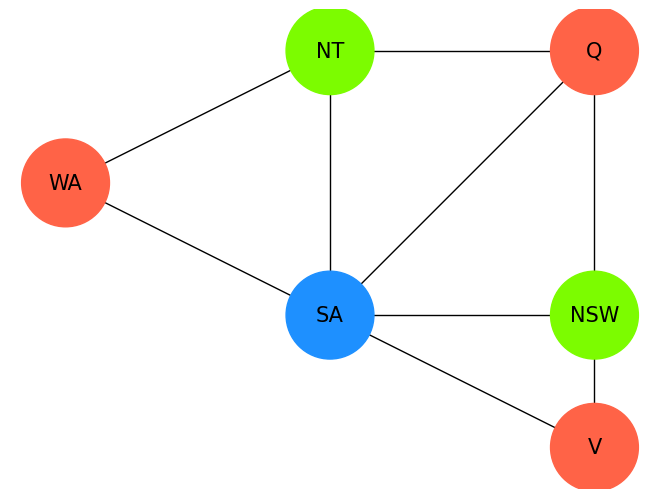

In [60]:
import matplotlib.pyplot as plt
import networkx as nx

class CSP:
    def __init__(self, variables, domains, constraints):
        self.variables = variables  
        self.domains = domains      
        self.constraints = constraints  

def init_assign(variables):
    return {var: None for var in variables}

def is_complete(assignment):
    return all(assignment[var] is not None for var in assignment)

def select_unassigned_variable(csp, assignment):
    unassigned_vars = [var for var in csp.variables if assignment[var] is None]
    return min(unassigned_vars, key=lambda var: len(csp.domains[var]))

def is_consistent(csp, assignment, var, value):
    for neighbor in csp.constraints[var]:
        if assignment[neighbor] == value:
            return False  
    return True

def inference(csp, var, value, assignment):
    inferences = {}
    for neighbor in csp.constraints[var]:
        if assignment[neighbor] is None:
            
            if value in csp.domains[neighbor]:
                csp.domains[neighbor].remove(value)
            if len(csp.domains[neighbor]) == 0:
                return None  
            inferences[neighbor] = csp.domains[neighbor]
    return inferences

def backtrack(assignment, csp):
    if is_complete(assignment):
        return assignment  

    var = select_unassigned_variable(csp, assignment)

    for value in csp.domains[var]:
        if is_consistent(csp, assignment, var, value):
            assignment[var] = value  
            inferences = inference(csp, var, value, assignment)
            if inferences is not None:
                result = backtrack(assignment, csp)  
                if result is not None:
                    return result  

            assignment[var] = None

    return None 

def backtracking_search(csp):
    assignment = init_assign(csp.variables)
    return backtrack(assignment, csp)

def visualize_map(solution):
    
    G = nx.Graph()

    edges = [
        ('WA', 'NT'), ('WA', 'SA'), ('NT', 'SA'), ('NT', 'Q'),
        ('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'),
        ('Q', 'NSW'), ('NSW', 'V')
    ]
    
    G.add_edges_from(edges)
    
    pos = {
        'WA': (0, 3), 'NT': (1, 4), 'SA': (1, 2), 'Q': (2, 4), 
        'NSW': (2, 2), 'V': (2, 1), 'T': (1.5, 0)
    }

    color_map = []
    colors = {
        'Red': '#FF6347', 'Green': '#7CFC00', 'Blue': '#1E90FF',
        'Yellow': '#FFD700', 'Cyan': '#00FFFF', 'Orange': '#FFA500', 'Pink': '#FF69B4'
    }
    
    for node in G:
        color_map.append(colors[solution[node]])

    nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=4000, font_size=15, font_color='black')
    plt.show()

variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']

domains = {
    'WA': ['Red', 'Green', 'Blue'],
    'NT': ['Red', 'Green', 'Blue'],
    'SA': ['Red', 'Green', 'Blue'],
    'Q': ['Red', 'Green', 'Blue'],
    'NSW': ['Red', 'Green', 'Blue'],
    'V': ['Red', 'Green', 'Blue'],
    'T': ['Red', 'Green', 'Blue']
}

constraints = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []  
}

csp = CSP(variables, domains, constraints)

solution = backtracking_search(csp)

if solution:
    print("Solution found:")
    print(solution)
    visualize_map(solution)  
else:
    print("No solution found.")


# Cryptarithmetic

In [1]:
def solveCryptarithmetic(problem):
    letters = extractUniqueLetters(problem)
    usedDigits = [False] * 10
    mapping = {letter: None for letter in letters}
    
    if solve(letters, usedDigits, mapping, 0, problem):
        printSolution(mapping)
    else:
        print("No solution found")

def solve(letters, usedDigits, mapping, index, problem):
    if index == len(letters):
        return isValid(mapping, problem)

    for digit in range(10):
        if not usedDigits[digit]:
            usedDigits[digit] = True
            mapping[letters[index]] = digit
            
            if solve(letters, usedDigits, mapping, index + 1, problem):
                return True
            
            usedDigits[digit] = False
            mapping[letters[index]] = None

    return False

def isValid(mapping, problem):
    translated_problem = problem
    for letter, digit in mapping.items():
        translated_problem = translated_problem.replace(letter, str(digit))
    
    try:
        return eval(translated_problem)
    except Exception:
        return False

def extractUniqueLetters(problem):
    return list(set(filter(str.isalpha, problem)))

def printSolution(mapping):
    print("Solution:")
    for letter, digit in mapping.items():
        print(f"{letter} -> {digit}")


problem ="SEND+MORE==MONEY"
solveCryptarithmetic(problem)


Solution:
N -> 6
Y -> 2
D -> 7
R -> 8
E -> 5
O -> 0
S -> 9
M -> 1


# FOL

In [8]:
class Constant:
    def __init__(self, name):
        self.name = str(name)
        
    def __repr__(self):
        return self.name

class Predicate:
    def __init__(self, name, *args):
        self.name = name
        self.args = args
        
    def __repr__(self):
        return f"{self.name}({', '.join(map(str, self.args))})"

class Quantifier:
    def __init__(self, quantifier, variable, statement):
        self.quantifier = quantifier
        self.variable = variable
        self.statement = statement
        
    def __repr__(self):
        return f"{self.quantifier}{self.variable} ({self.statement})"

class LogicalConnective:
    def __init__(self, connective, left, right):
        self.connective = connective
        self.left = left
        self.right = right
        
    def __repr__(self):
        return f"({self.left} {self.connective} {self.right})"


Jack = Constant("Jack")
Curiosity = Constant("Curiosity")
Tuna = Constant("Tuna")

def animal(y):
    return Predicate("Animal", y)

def loves(x, y):
    return Predicate("Loves", x, y)

def kills(x, y):
    return Predicate("Kills", x, y)


everyone_loves_animals = Quantifier("∀", "x",
    LogicalConnective("→",
        Quantifier("∀", "y", LogicalConnective("→", animal(Constant("y")), loves(Constant("x"), Constant("y")))),
        Quantifier("∃", "z", loves(Constant("z"), Constant("x")))
    )
)


anyone_kills_animal = Quantifier("∀", "x",
    LogicalConnective("→",
        Quantifier("∃", "y", LogicalConnective("∧", animal(Constant("y")), kills(Constant("x"), Constant("y")))),
        Quantifier("∀", "z", Predicate("¬", loves(Constant("z"), Constant("x"))))
    )
)

jack_loves_all_animals = Quantifier("∀", "y", loves(Jack, Constant("y")))

either_jack_or_curiosity_killed = LogicalConnective("∨", kills(Jack, Tuna), kills(Curiosity, Tuna))

did_curiosity_kill_cat = Predicate('¬',kills(Curiosity, Tuna))

tunacatis_animal=Quantifier('∀','x',LogicalConnective('→',Predicate('Cat',Constant('x')),animal(Constant('x'))))

print("1. Everyone who loves all animals is loved by someone:\n", everyone_loves_animals)
print("2. Anyone who kills an animal is loved by no one:\n", anyone_kills_animal)
print("3. Jack loves all animals:\n", jack_loves_all_animals)
print("4. Either Jack or Curiosity killed the cat named Tuna:\n", either_jack_or_curiosity_killed)
print("5. Did Curiosity kill the cat?\n", did_curiosity_kill_cat)
print("6",Predicate('Cat',Constant('Tuna')))
print("7",tunacatis_animal)

1. Everyone who loves all animals is loved by someone:
 ∀x ((∀y ((Animal(y) → Loves(x, y))) → ∃z (Loves(z, x))))
2. Anyone who kills an animal is loved by no one:
 ∀x ((∃y ((Animal(y) ∧ Kills(x, y))) → ∀z (¬(Loves(z, x)))))
3. Jack loves all animals:
 ∀y (Loves(Jack, y))
4. Either Jack or Curiosity killed the cat named Tuna:
 (Kills(Jack, Tuna) ∨ Kills(Curiosity, Tuna))
5. Did Curiosity kill the cat?
 ¬(Kills(Curiosity, Tuna))
6 Cat(Tuna)
7 ∀x ((Cat(x) → Animal(x)))


In [12]:
import re

def classify_fol(fol_sentence):
    constants = []
    variables = []
    predicates = []
    functions = []
    quantifiers = []
    connectives = []
    implications = []

    constants_pattern = r"\b[A-Z][a-zA-Z0-9]*\b"
    variables_pattern = r"\b[a-z]\b"
    predicates_functions_pattern = r"\b([A-Za-z]+)\(([a-zA-Z0-9, ]+)\)"
    quantifiers_pattern = r"(∀|∃)"
    connectives_pattern = r"(and|or|not|→|∨|∧)"

    constants = re.findall(constants_pattern, fol_sentence)
    
    variables = re.findall(variables_pattern, fol_sentence)
    
    matches = re.findall(predicates_functions_pattern, fol_sentence)
    for match in matches:
        func_name = match[0]
        params = match[1].split(',')
        functions.append(func_name)
        predicates.append(func_name)  
        
        for param in params:
            param = param.strip()
            if re.match(constants_pattern, param):
                constants.append(param)
            elif re.match(variables_pattern, param):
                variables.append(param)

    quantifiers = re.findall(quantifiers_pattern, fol_sentence)

    connectives = re.findall(connectives_pattern, fol_sentence)

    implications = re.findall(r"→", fol_sentence)

    result = {
        "constants": list(set(constants)), 
        "variables": list(set(variables)), 
        "predicates": list(set(predicates)),
        "functions": list(set(functions)),
        "quantifiers": list(set(quantifiers)),
        "connectives": list(set(connectives)),
        "implications": len(implications) > 0  
    }
    
    return result


# Function to convert a sentence into FOL
def convert_to_fol(sentence):
    sentence = sentence.strip().lower()
    
    fol_rules = {
        r"(.+) was a (.+)\.": lambda subject, predicate: f"{predicate.capitalize()}({subject.capitalize()})",
        r"all (.+) were (.+)\.": lambda group1, group2: f"∀x ({group1.capitalize()}(x) → {group2.capitalize()}(x))",
        r"everyone is legal to someone\.": lambda: "∀x ∃y Legal(x, y)",
        r"(.+) tried to (.+) (.+)\.": lambda subject, action, target: f"Tried{action.capitalize()}({subject.capitalize()}, {target.capitalize()})",
        r"all men are people\.": lambda: "∀x (Man(x) → Person(x))",
        r"all romans were loyal to (.+) or hated him\.": lambda target: f"∀x (Roman(x) → (LoyalTo(x, {target.capitalize()}) ∨ Hate(x, {target.capitalize()})))",
        r"people only try to (.+) if they are not loyal to\." : lambda action: f"∀x ∀y (Person(x) ∧ Try{action.capitalize()}(x, y) → ¬LoyalTo(x, y))"
    }
    for pattern, fol_lambda in fol_rules.items():
        match = re.match(pattern, sentence)
        if match:
            return fol_lambda(*match.groups())
        
    
    return "No FOL conversion rule found."

sentences = [
    "Marcus was a man.",
    "Marcus was a Pompian.",
    "All Pompians were Romans.",
    "Caeser was a ruler.",
    "Everyone is legal to someone.",
    "Marcus tried to assassinate Caeser.",
    "All men are people.",
    "All Romans were loyal to Caeser or hated him.",
    "People only try to assassinate if they are not loyal to."
]

for sentence in sentences:
    fol_sentence = convert_to_fol(sentence)
    print(f"\n\nOriginal: {sentence}\nFOL: {fol_sentence}\nIt has")
    print(classify_fol(fol_sentence))




Original: Marcus was a man.
FOL: Man(Marcus)
It has
{'constants': ['Man', 'Marcus'], 'variables': [], 'predicates': ['Man'], 'functions': ['Man'], 'quantifiers': [], 'connectives': [], 'implications': False}


Original: Marcus was a Pompian.
FOL: Pompian(Marcus)
It has
{'constants': ['Pompian', 'Marcus'], 'variables': [], 'predicates': ['Pompian'], 'functions': ['Pompian'], 'quantifiers': [], 'connectives': [], 'implications': False}


Original: All Pompians were Romans.
FOL: ∀x (Pompians(x) → Romans(x))
It has
{'constants': ['Romans', 'Pompians'], 'variables': ['x'], 'predicates': ['Romans', 'Pompians'], 'functions': ['Romans', 'Pompians'], 'quantifiers': ['∀'], 'connectives': ['→'], 'implications': True}


Original: Caeser was a ruler.
FOL: Ruler(Caeser)
It has
{'constants': ['Caeser', 'Ruler'], 'variables': [], 'predicates': ['Ruler'], 'functions': ['Ruler'], 'quantifiers': [], 'connectives': [], 'implications': False}


Original: Everyone is legal to someone.
FOL: ∀x ∃y Legal(x, 

# Unification

In [ ]:
import re

def is_function(sentence):
    """Check if the sentence contains a function and extract function name and parameters."""
    match = re.match(r'(\w+)\((.*)\)', sentence)
    if match:
        function_name = match.group(1)
        parameters = match.group(2).split(',')
        return function_name, [param.strip() for param in parameters]
    return None

def replace_with_theta(value, theta):
    """Recursively replace values in theta with their corresponding keys."""
    # Replace with substitutions from theta, both keys and values
    while value in theta:
        value = theta[value]
    return value

def unify_parameters(param1, param2, theta={}):
    """Unify two parameters. At least one must be a variable (uppercase or lowercase)."""
    param1 = replace_with_theta(param1, theta)
    param2 = replace_with_theta(param2, theta)

    if param1 == param2:
        return theta  # No unification needed
    elif is_variable(param1) and (not is_variable(param2) or is_function(param2)):
        return unify_var(param1, param2, theta)
    elif is_variable(param2) and (not is_variable(param1) or is_function(param1)):
        return unify_var(param2, param1, theta)
    elif is_function(param1) and is_function(param2):
        name1, params1 = is_function(param1)
        name2, params2 = is_function(param2)

        if name1 != name2 or len(params1) != len(params2):
            return "failure"

        # Unify each parameter
        for p1, p2 in zip(params1, params2):
            result = unify_parameters(p1, p2, theta)
            if result == "failure":
                return "failure"

        # Handle the parameter substitutions for functions
        for i in range(len(params1)):
            if is_function(params1[i]) and is_function(params2[i]):
                # Unify their parameters
                inner_theta = unify_parameters(params1[i], params2[i], theta)
                if inner_theta == "failure":
                    return "failure"
                theta.update(inner_theta)

                # Now replace parameters in theta
                for j in range(len(params1)):
                    # Replace parameters with corresponding values or keys
                    params1[j] = replace_with_theta(params1[j], theta)
                    params2[j] = replace_with_theta(params2[j], theta)

        return theta

    return "failure"

def unify_var(var, value, theta):
    """Unify a variable with a value. If already in the substitution map, check consistency."""
    if var in theta:
        return unify_parameters(theta[var], value, theta)
    elif value in theta:
        return unify_parameters(var, theta[value], theta)
    else:
        theta[var] = value
        print(f"{var}/{value}")  # Print the unification step
        return theta

def is_variable(x):
    """Check if the term is a variable (by convention, lowercase or uppercase letters represent variables)."""
    return type(x) == str and len(x) == 1 and (x.islower() or x.isupper())

def unify_sentences(sentence1, sentence2):
    """Unify two sentences if they are functions with the same name. Handles any number of parameters."""
    func1 = is_function(sentence1)
    func2 = is_function(sentence2)

    if func1 and func2:
        name1, params1 = func1
        name2, params2 = func2
        if name1 != name2 or len(params1) != len(params2):
            return "failure"

        theta = {}
        for p1, p2 in zip(params1, params2):
            result = unify_parameters(p1, p2, theta)
            if result == "failure":
                return "failure"
        for key in list(theta.keys()):
            theta[key] = replace_with_theta(theta[key], theta)

        return theta
    return "failure"
sentence1 = "Prime(13)"
sentence2 = "Prime(y)"

sentence3 = "Knows(John, x)"
sentence4 = "Knows(y, Mother(y))"

sentence5 = "pro(b(x), X, f(g(Z)))"
sentence6 = "pro(Z, f(Y), f(Y))"

sentence7 = "Quick(a, g(x, a), f(y))"
sentence8 = "Quick(a, g(f(b), a), x)"

print("Unifying Prime(13) and Prime(y):")
result1 = unify_sentences(sentence1, sentence2)  # Expected output: y/13
print(result1)

print("\nUnifying Knows(John, x) and Knows(y, Mother(y)):")
result2 = unify_sentences(sentence3, sentence4)  # Expected output: y/John, x/Mother(John)
print(result2)

print("\nUnifying pro(b(x), X, f(g(Z))) and pro(Z, f(Y), f(Y)):")
result3 = unify_sentences(sentence5, sentence6)  # Expected output: {'Z': 'b(x)', 'X': 'f(Y)', 'Y': 'g(b)'}
print(result3)

print("\nUnifying Quick(a, g(x, a), f(y)) and Quick(a, g(f(b), a), x):")
result4 = unify_sentences(sentence7, sentence8)  # Expected output: failure
print(result4)


Unifying Prime(13) and Prime(y):
y/13
{'y': '13'}

Unifying Knows(John, x) and Knows(y, Mother(y)):
y/John
x/Mother(y)
{'y': 'John', 'x': 'Mother(y)'}

Unifying pro(b(x), X, f(g(Z))) and pro(Z, f(Y), f(Y)):
Z/b(x)
X/f(Y)
Y/g(Z)
{'Z': 'b(x)', 'X': 'f(Y)', 'Y': 'g(Z)'}

Unifying Quick(a, g(x, a), f(y)) and Quick(a, g(f(b), a), x):
failure
